📝 Project: Regression on Retail Product Unit Price Prediction In this project, we work with a real-world retail dataset that captures product details, transactional attributes, and competitive pricing insights. The goal is to build a machine learning pipeline—from data preprocessing and exploration to model training and evaluation to predict the unit price of a product based on both product metadata and market context.

🎯 Objective:

The main objective is to develop and compare multiple regression models that can accurately predict the unit selling price of retail products. This prediction is crucial for optimizing pricing strategies, staying competitive, and increasing profitability in the dynamic e-commerce environment.

🤖 Models Evaluated

- MultiLinear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

- Random Forest Regressor

- Tuned Random Forest Regressor

- XGBoost Regressor

Evaluation Metrics To assess model performance, the following regression metrics are used:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics help evaluate the accuracy and consistency of the models in predicting continuous values.

Outcome:

By comparing these models, we aim to:

Identify the best-performing regression model for retail pricing prediction

Understand how various features—such as product category, freight price, competition prices, product descriptions, and time—influence product pricing

Provide actionable insights for price optimization, competitive benchmarking, and promotional planning in retail operations

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data=pd.read_csv("C:/Users/SUSHMITHA/Downloads/sudents and projects (1)/sudents and projects/S4/Reression/retail_price.csv")
data

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [6]:
data.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [10]:
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [12]:
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

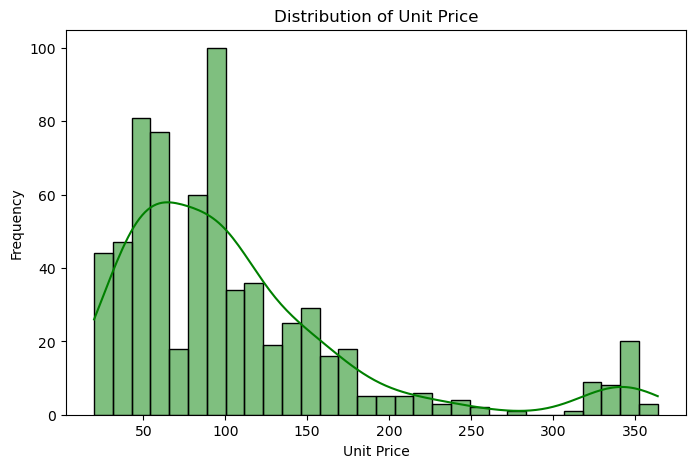

In [74]:
plt.figure(figsize=(8, 5))
sns.histplot(data['unit_price'], bins=30, kde=True, color='green')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

- Distribution Shape: The distribution appears to be right-skewed, indicating that most unit prices are concentrated at lower values, while there are some higher-priced items.
- Peak Frequency: The highest frequency is around 80-100 units, suggesting that this range contains the most common unit prices.
- KDE Curve: The KDE curve provides a smoothed representation of the underlying distribution, helping to visualize the overall shape and trends in the data.

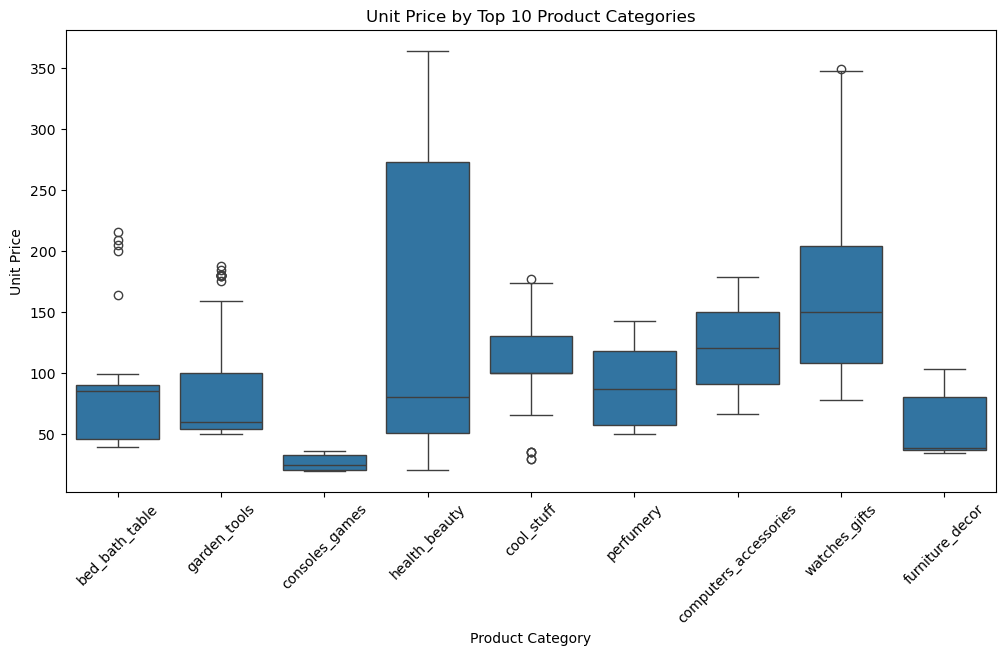

In [18]:
plt.figure(figsize=(12, 6))
top_categories = data['product_category_name'].value_counts().nlargest(10).index
sns.boxplot(data=data[data['product_category_name'].isin(top_categories)],
            x='product_category_name', y='unit_price')
plt.title('Unit Price by Top 10 Product Categories')
plt.xticks(rotation=45)
plt.ylabel('Unit Price')
plt.xlabel('Product Category')
plt.show()

1. Product Category Pricing Trends: The box plot reveals significant variations in unit prices across different product categories. Categories like "watches_gifts" and "computers_accessories" exhibit higher median prices and greater price ranges, indicating a wider distribution of prices within these categories. In contrast, categories such as "consoles_games" and "furniture_decor" show lower median prices and narrower price ranges, suggesting more consistent pricing within these categories.

2. Outliers and Price Variability: The presence of outliers in categories like "bed_bath_table" and "garden_tools" suggests that there are some products with significantly higher prices than the rest within these categories. This could be due to premium or specialty products. The variability in prices, as indicated by the length of the boxes and whiskers, is highest in categories like "watches_gifts," indicating a broad range of prices for products within this category.

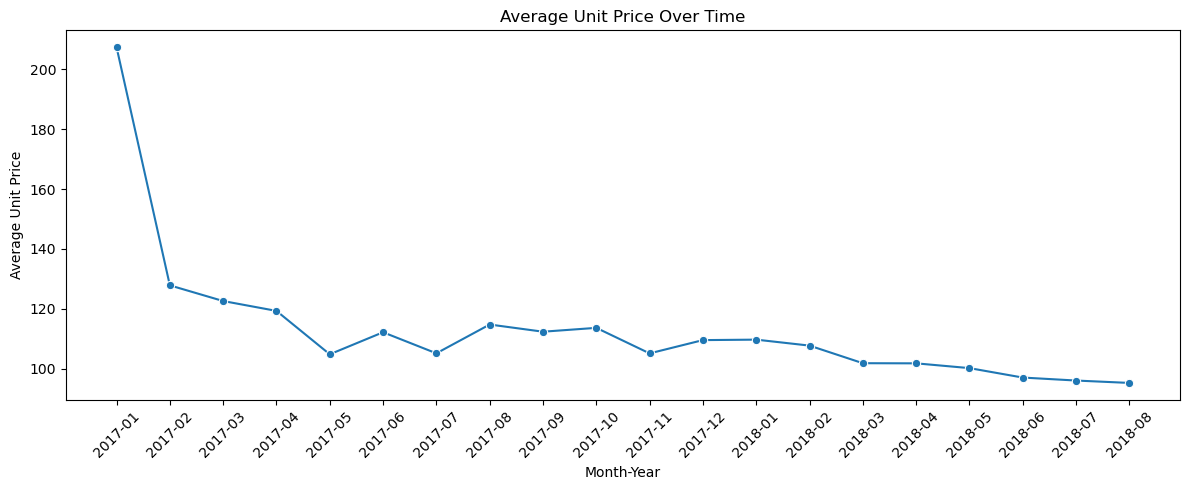

In [21]:
# Convert month_year if not already datetime
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y', errors='coerce')

# Monthly average unit price
monthly_price = data.groupby(data['month_year'].dt.to_period('M'))['unit_price'].mean().reset_index()
monthly_price['month_year'] = monthly_price['month_year'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_price, x='month_year', y='unit_price', marker='o')
plt.title('Average Unit Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Declining Trend: The graph shows a clear declining trend in the average unit price over time, starting from a high point in January 2017 and gradually decreasing until August 2018.
2. Stabilization: After an initial sharp decline, the average unit price seems to stabilize around 100 units from mid-2017 onwards, with minor fluctuations but no significant changes.

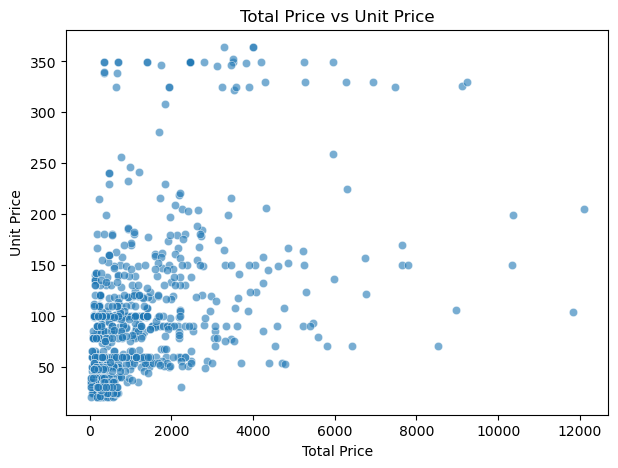

In [24]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='total_price', y='unit_price', alpha=0.6)
plt.title('Total Price vs Unit Price')
plt.xlabel('Total Price')
plt.ylabel('Unit Price')
plt.show()

- Weak Correlation: The scatter plot reveals a weak correlation between the total price and unit price. This is evident from the random distribution of data points across the plot, indicating that there is no strong linear relationship between these two variables.

- Outliers and Variability: The presence of outliers in the upper right quadrant of the plot suggests that there are instances where both total price and unit price are significantly higher than average. Additionally, the variability in unit prices for lower total prices indicates that other factors may influence unit pricing beyond just the total cost.

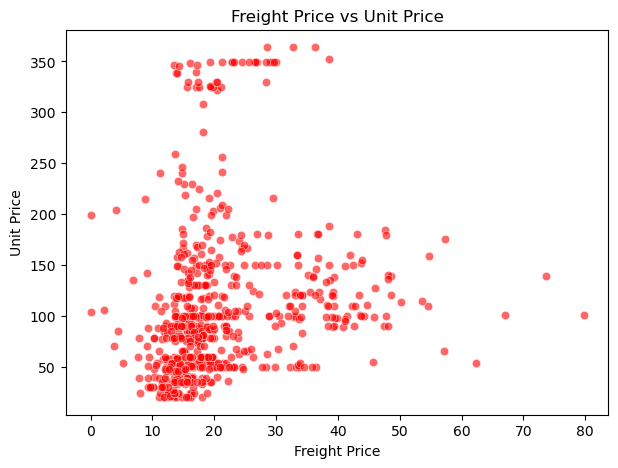

In [27]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='freight_price', y='unit_price', color='red', alpha=0.6)
plt.title('Freight Price vs Unit Price')
plt.xlabel('Freight Price')
plt.ylabel('Unit Price')
plt.show()

- Negative Correlation: The scatter plot shows a negative correlation between freight price and unit price. As the freight price increases, the unit price tends to decrease. This suggests that higher freight costs may be associated with lower unit prices, possibly due to economies of scale or other market factors.

- Data Distribution: The data points are densely clustered in the lower range of freight prices (0-40) and unit prices (50-150), indicating that most observations fall within this range. There is a noticeable decline in data points as freight prices increase beyond 40, suggesting fewer instances of high freight costs in the dataset.

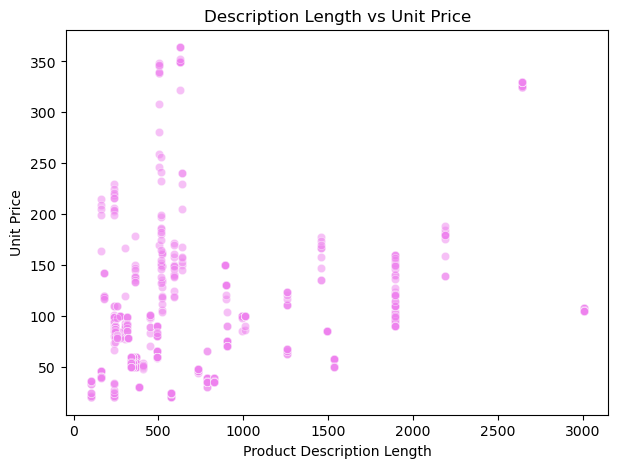

In [32]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='product_description_lenght', y='unit_price',color ='violet', alpha=0.5)
plt.title('Description Length vs Unit Price')
plt.xlabel('Product Description Length')
plt.ylabel('Unit Price')
plt.show()


- No Clear Correlation: The scatter plot of "Description Length vs Unit Price" does not show a clear positive or negative correlation between the two variables. The data points are scattered randomly across the plot, indicating that there is no strong relationship between the length of a product description and its unit price.

- Outliers and Variability: There are several outliers in the data, with some products having very high unit prices despite having short descriptions, while others have long descriptions but low unit prices. This suggests that there may be other factors at play that influence the unit price of a product, such as brand reputation, quality, or demand. The variability in the data also indicates that the relationship between description length and unit price is complex and may not be easily modeled using a simple linear regression.

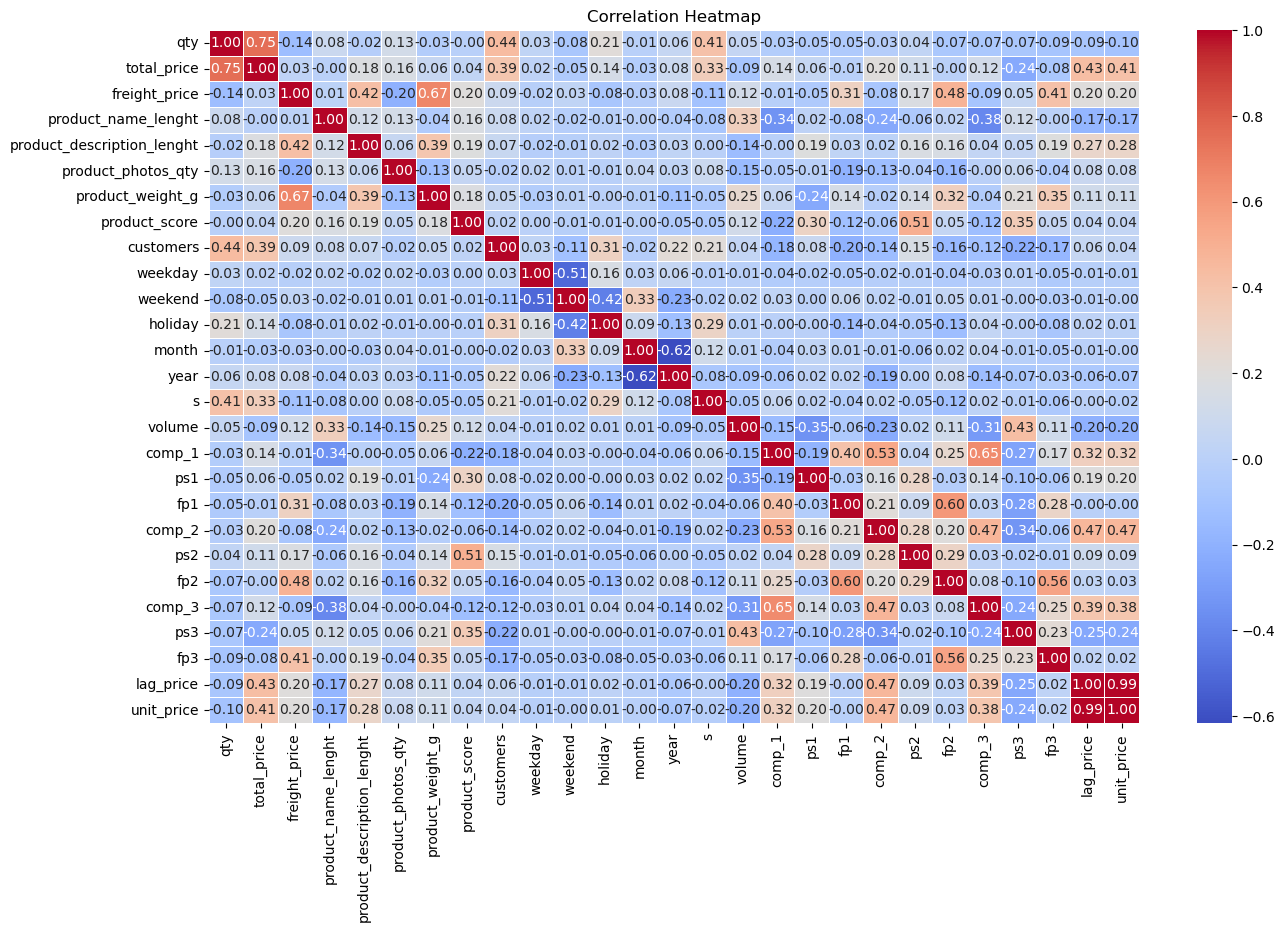

In [35]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).drop(columns=['unit_price'])  # keep target separate
corr_matrix = data[numeric_cols.columns.tolist() + ['unit_price']].corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Strong Positive Correlation: The correlation heatmap reveals a strong positive correlation between 'total_price' and 'retail_price', as indicated by the value of 1.00. This suggests that these two variables are highly related, with an increase in one variable corresponding to an increase in the other.

- Moderate Negative Correlation: A moderate negative correlation is observed between 's' and 'comp_2', with a correlation coefficient of -0.55. This implies that as 's' increases, 'comp_2' tends to decrease, and vice versa.

In [38]:
# Step 2: Drop Unnecessary Columns
data=data.drop('product_id', axis=1)

In [40]:
# Extract date components
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y', errors='coerce')
data['month'] = data['month_year'].dt.month
data['year'] = data['month_year'].dt.year
data['month_index'] = (data['year'] - data['year'].min()) * 12 + data['month']


In [42]:
data=data.drop('month_year', axis=1)

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['product_category_name'] = le.fit_transform(data['product_category_name'])

X = data.drop("unit_price", axis=1)
y = data["unit_price"]

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h1>Multilinear Regression</h1>

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)

🔹 Multiple Linear Regression
MAE: 4.355196406582967
MSE: 66.23691974472527
RMSE: 8.138606744690719
🔹 R² Score (Accuracy for Regression): 0.987739112487981


<h1>Polynomial Regression</h1>

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)


🔸 Polynomial Regression (Degree=2)
MAE: 10.046418535900735
MSE: 469.6000402814038
RMSE: 21.670257042347323


<h1>SVR</h1>

In [59]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)


🔹 Support Vector Regression
MAE: 39.7830754725929
MSE: 4074.2739271808405
RMSE: 63.83003937943984
🔹 R² Score (Accuracy for Regression): 0.24582522093663262


<h1>RandomForest Regressor</h1>

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)

print("\n🔸 Random Forest Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("🔹 R² Score (Accuracy for Regression):", r2)


🔸 Random Forest Regression
MAE: 3.1719326585147165
MSE: 46.905602899732
RMSE: 6.848766523961231
🔹 R² Score (Accuracy for Regression): 0.9913174658022523


<h1>XGB Regressor</h1>

In [65]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_xgb)
MSE = mean_squared_error(y_test, y_pred_xgb)
RMSE = np.sqrt(MSE)

print("\n🔹 XGBoost Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
# 


🔹 XGBoost Regression
MAE: 3.4004599487102913
MSE: 44.234893442657715
RMSE: 6.650931772515616


In [67]:
import matplotlib.pyplot as plt

# Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest','XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test, y_pred_poly),    # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),     # SVR
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb)
]

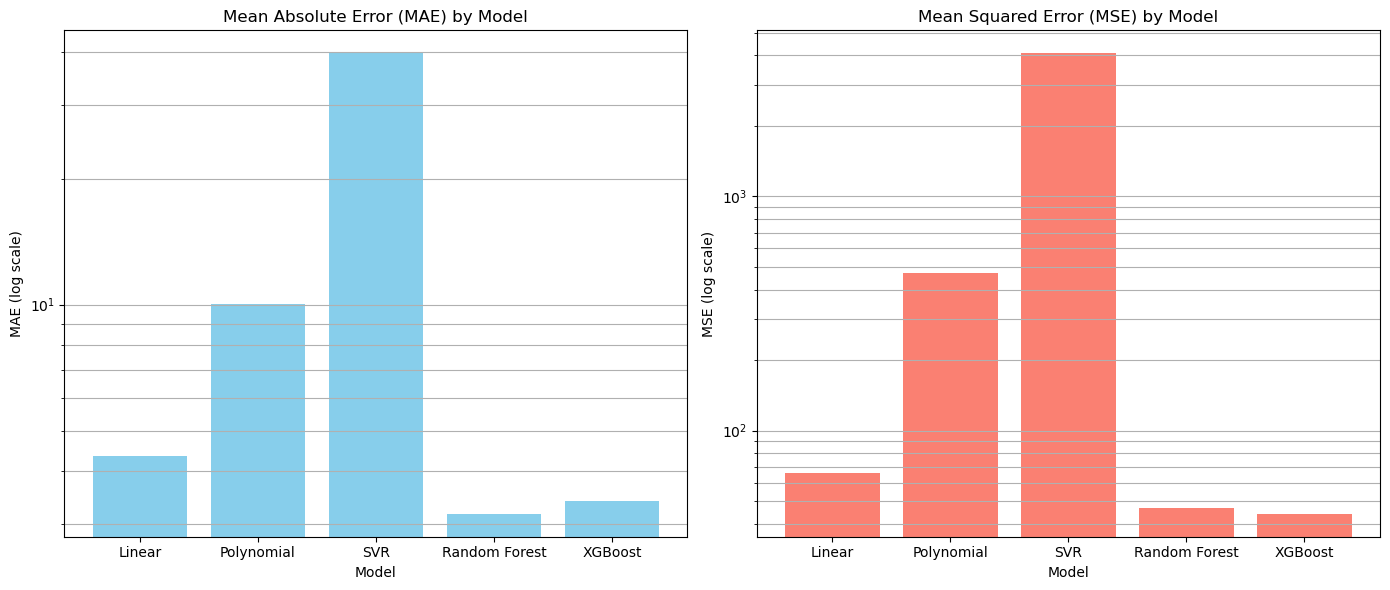

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MAE Plot (log scale)
axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title("Mean Absolute Error (MAE) by Model")
axs[0].set_ylabel("MAE (log scale)")
axs[0].set_xlabel("Model")
axs[0].set_yscale('log')  # ✅ log scale
axs[0].grid(axis='y', which='both')

# MSE Plot (log scale)
axs[1].bar(model_names, mse_values, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) by Model")
axs[1].set_ylabel("MSE (log scale)")
axs[1].set_xlabel("Model")
axs[1].set_yscale('log')  # ✅ log scale
axs[1].grid(axis='y', which='both')

plt.tight_layout()
plt.show()


Based on the graphs:
it appears that Linear Regression, Random Forest, and XGBoost are the top-performing models for this regression task, with lower MAE and MSE values compared to the other models. 
- The SVR Model has the highest error rates, indicating that it may not be the best choice for this particular task.
-  However, without more information about the dataset and the specific requirements of the task, it is difficult to make a definitive conclusion.